In [8]:
import os
from PIL import Image
import numpy as np

src_dir = r"C:\Users\tsx10\PythonProjectsJupyter\TUM\FP\Images\trainning\data\raw\mini MNIST JPG"
out_dir = r"C:\Users\tsx10\PythonProjectsJupyter\TUM\FP\Images\trainning\data\processed\mini MNIST npy"

out_json = {
        "info": {
            "mean": tuple(),
            "std": tuple(),
        }
    }

split = "train"
label = '0'
file_name = os.listdir(f"{src_dir}/{split}/{label}")[0]

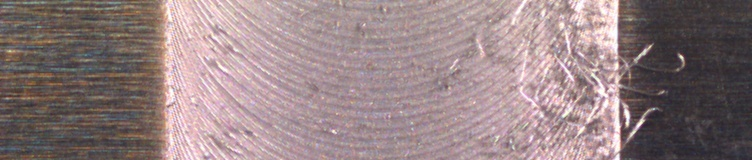

In [9]:
img_frame = Image.open(f"{src_dir}/{split}/{label}/{file_name}")
img_frame

In [10]:
img_np = np.array(img_frame)/255
img_np

array([[[0.43529412, 0.34509804, 0.29019608],
        [0.41960784, 0.3254902 , 0.28627451],
        [0.41568627, 0.32156863, 0.32156863],
        ...,
        [0.2745098 , 0.26666667, 0.27058824],
        [0.28627451, 0.26666667, 0.28235294],
        [0.2745098 , 0.25490196, 0.27058824]],

       [[0.41176471, 0.34901961, 0.28627451],
        [0.39215686, 0.34117647, 0.27843137],
        [0.4       , 0.34117647, 0.32156863],
        ...,
        [0.26666667, 0.25098039, 0.25490196],
        [0.2745098 , 0.25882353, 0.2627451 ],
        [0.26666667, 0.24705882, 0.2627451 ]],

       [[0.44705882, 0.4627451 , 0.36470588],
        [0.44313725, 0.4627451 , 0.37254902],
        [0.45098039, 0.46666667, 0.4       ],
        ...,
        [0.2627451 , 0.23921569, 0.23921569],
        [0.27058824, 0.24705882, 0.25490196],
        [0.26666667, 0.24313725, 0.25098039]],

       ...,

       [[0.41960784, 0.30980392, 0.2627451 ],
        [0.42745098, 0.31764706, 0.27058824],
        [0.42352941, 0

In [11]:
img_np.mean(axis=1).mean(axis=0)

array([0.57967645, 0.50520716, 0.51124749])

In [12]:
mean = list()
std = list()

for i in range(img_np.shape[2]):
    pixels = img_np[:, :, i].ravel()
    mean.append(np.mean(pixels))
    std.append(np.std(pixels))

mean

[0.5796764510325407, 0.5052071599916562, 0.5112474903525239]

In [13]:
np.array(std)

array([0.22246725, 0.1948534 , 0.19966311])

In [14]:
np.zeros(3)

array([0., 0., 0.])

In [16]:
"""
preprocessing scripts to move the data from
data/raw to data/processed.
"""

import numpy as np
import os
import json
from PIL import Image


def preprocess_mini_mnist(src_dir, out_dir):

    out_json = {
        "info": {
            "mean": np.zeros(3),
            "std": np.zeros(3),
        }
    }

    for split in ["train", "test"]:
        out_json[split] = []

        for label in os.listdir(f"{src_dir}/{split}"):
            print("processing", label)
            curr_out_dir = f"{out_dir}/{split}/{label}"
            os.makedirs(curr_out_dir, exist_ok=True)

            for file_name in os.listdir(f"{src_dir}/{split}/{label}"):
                # open image in greyscale mode
                img_frame = Image.open(f"{src_dir}/{split}/{label}/{file_name}")
                # convert to numpy and scale
                img_np = np.array(img_frame)/255.
                np.save(f"{curr_out_dir}/{file_name.replace('.jpg', '.npy')}", img_np)

                # append path and label
                out_json[split].append({
                    "path": f"{curr_out_dir}/{file_name.replace('.jpg', '.npy')}",
                    "label": int(label)
                })

                if split == "train":
                    # compute stats standardization and save them to json
                    mean = list()
                    std = list()
                    for i in range(img_np.shape[2]):
                        pixels = img_np[:, :, i].ravel()
                        mean.append(np.mean(pixels))
                        std.append(np.std(pixels))

                    out_json["info"]["mean"] += np.array(mean)
                    out_json["info"]["std"] += np.array(std)

    out_json["info"]["mean"] = list(out_json["info"]["mean"]/len(out_json["train"]))
    out_json["info"]["std"] = list(out_json["info"]["std"]/len(out_json["train"]))
    with open(out_dir + "/data.json", "w") as file:
        file.write(json.dumps(out_json, indent=4))

if __name__ == "__main__":
    preprocess_mini_mnist("../data/raw/mini MNIST JPG", out_dir="../data/processed/mini MNIST npy")


processing 0
processing 1
processing 0
processing 1


In [17]:
import preprocessing

preprocess_mini_mnist("../data/raw/mini MNIST JPG", out_dir="../data/processed/mini MNIST npy")

processing 0
processing 1
processing 0
processing 1
